<h1 style='text-align: center;'><mark>Apache Spark</mark></h1>
Apache Spark Sistema diseñado para procesar datos de manera distribuida sobre clusters. Spark puede procesar cantidades de datos en el orden de terabytes incluso petabytes. El concepto Spark es imaginar un cluster como una memoria gigante, la memoria resultante de combinar las memorias de todos los clusters. Se prioriza el uso de memoria y consigue ser muy rápido el procesamiento de la información, mayor que si utilizara MapReduce (Google). Spark utilizada MapReduce para algunas tareas de clasificacion mediante regresión. Apache Spark esta implementando en Scala que se ejecutando en la maquina virtual de java. Ademas de Spark ofrece interfaces de programación para java, python y R.

Características: velocidad de procesamiento, soporte multilenguajes, analisis avanzado. Se puede desarrollar en tres maneras:
1) Solo: standalone- Utiliza como base HDFS y encima se encuentra spark.
2) Hadoop (Yarn, admin de recursos): Base HDFS-> Yarn/Mesos(kernel admin del cluster) -> Spark
3) Spark con MapReduce (Spark in MapReduce, SIMR): Base HDFS -> MapReduce y dentro se encuentra Spark.

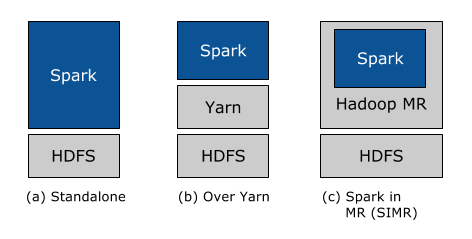

# Componentes de Spark
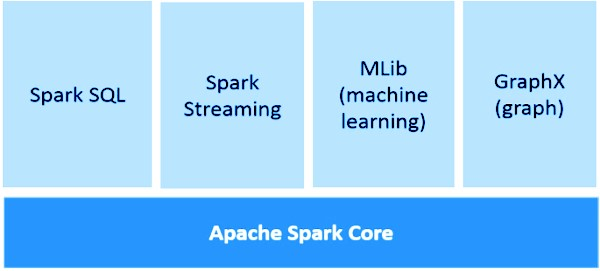

Cuando se ejecuta Spark en un ambiente distribuida se distinguen dos tipos de procesos: driver y executor. Un proceso driver conectado a 3 procesos executor localizados en dos nodos de cluster:
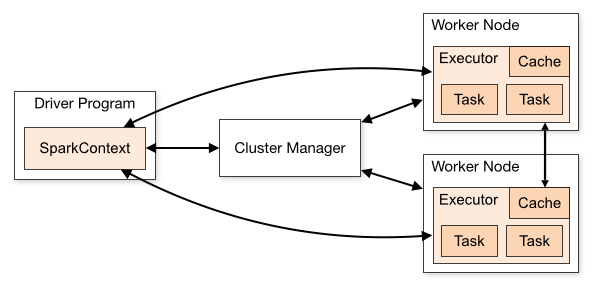

Driver: Proceos principal.  Este proceso tiene un objeto SparkContext que le permite conectar con el gestor del cluster y reservar procesos executor en los distintos nodos del cluster. Cada uno de los nodos del cluster (tambien se conocen como worker) podrá ejecutar uno o varios procesos executor que almacenará fragmentos de los datos del programa y realizará operaciones sobre ellos. Durante la ejecución irá enviando peticiones a los distintos procesos executor que pueden contactar entre ellos para realizar tareas y comunicar con el proceso driver para devolver resultados.

RDD(Resilient Distributed Dataset) Tipo de datos básico. Estos datos almacenan información de manera distrubuida entre todos los equipos de cluster. Durante la ejecuccion de un programa Sparl se construye varios RDDs que dividen en distintos fragmentos y son almacenados en la memoria de los equipos del cluster. Característica: 1) Están formados por un conjunto de registros, tambien llamados elementos, todos del mismo tipo. Por ejemplo, si cargamos un RDD apartir de un archivo plano se creará un RDD de una cadena de texto, una por cada linea del archivo. En Scala o Java, al declarar un RDD se debe definir el tipo de los registors: Lenguaje estaticos: RDD[String]en Scala y JavaRDD en Java. En dinámicos: python se puede mezclar los tipos de datos.

RDDs se han diseñado desde el inicio para ser distribuidos: los registros que los compnen se repartirán entre los clúster. Para realizar estra distribución: los RDDS se dividen en particiones. Cada partición se almacena únicamente en un proceso executor dentro de un nodo del clúster, aunque un proceso executor puede albergar distintas particiones de distintos RDDs. El número de particiones en las que dividir un RDD se puede configurar e incluso cambiar a lo largo de la ejecución,por default es el número de núcleos de procesamiento disponibles en el clúster.

Para decidir qué registros forman parte de cada partición, Spark utiliza particionadores, que son funciones que toman un registro y devuelven el número de la partición a la que pertenecen. Estos particionadores se puede configurar si se desea mejorar el rendimiento o dejar el default.

Ejemplo: cómo se podría particionar un RDD de 13 parejas (int, str) sobre 3 procesos executor utilizando el rango de valores del primer elemento de la pareja.
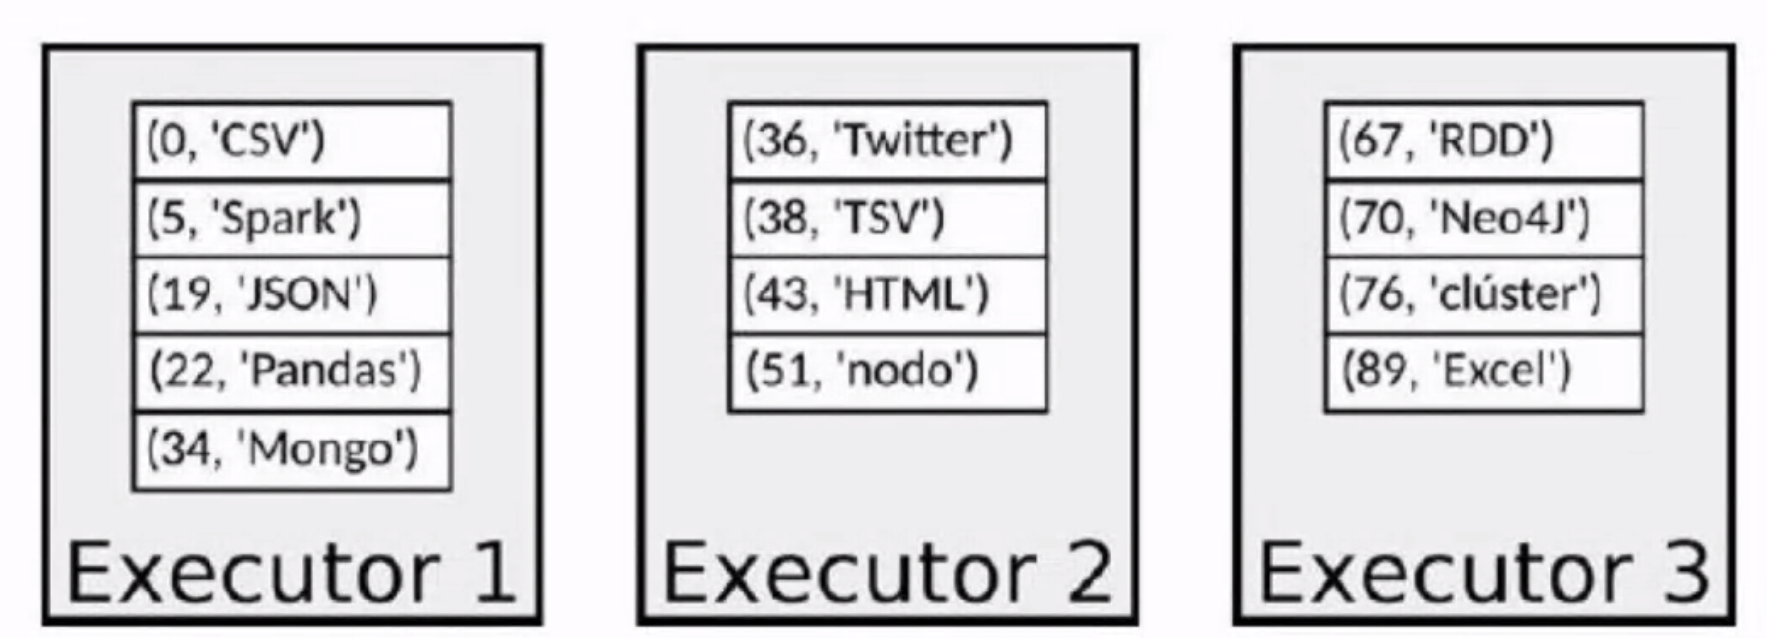


Los RDDs son inmutalbes: no se pueden modificar ni actualizar. Una vez creado, asi permanece hasta que termina la ejecución del programa.

RDDs admiten dos tipos de operaciones:
    transformaciones y acciones
pero ninguna de ellas modifica el RDD. 
*Transformaciones:
    son operaciones que toman un RDD de partida y crean un nuevo
    RDD, dejando el original intacto. 
    Ejemplos: son aplicar una
    función a todos los registros del RDD
    (por ejemplo, sumar una cierta cantidad), 
    filtrar únicamente aquellos registros que cumplan una cierta condición u ordenarlos
    mediante algún campo.
*Acciones:
    son operaciones que realizan algún cómputo sobre
    el RDD y devuelven un valor, dejando también el 
    RDD original inalterado. 
    Ejemplos : sumar todos los elementos almacenados 
    en un RDD de números, generando un valor final, o
    "vaciar" un RDD a un archivo de texto. 


Concepto importante del RDD: Resilencia
    Tienen la capacidad de recuperar su estado inicial
    cuando existe algún problema.
    Esto se debe a que los RDDs son particionados y cada 
    partición ha sido almacenada en un proceso executor. 
    Por lo que apartir de su estado inicial, repite las
    transformaciónes que tiene programadas. De esta manera,
    regenera las particiones perdidas.
    
    Dos maneras de trabajar de RDD:
       * paralelizando una coleccion que ya existe en el driver
       * referencia un dataset
Referencia de clase de RDD: https://spark.apache.org/docs/1.1.1/api/python/pyspark.rdd.RDD-class.html

SparkContext: método inicial para trabajar con PySpark

In [1]:
#conda install - c conda-forge findspark
import findspark
findspark.init()
findspark.find()

'C:\\spark'

In [2]:
import pyspark

In [3]:
pyspark.version

<module 'pyspark.version' from 'C:\\spark\\python\\pyspark\\version.py'>

In [3]:
sc = pyspark.SparkContext(appName="Prueba")#sc objeto que se apunta a SC al cluster local

In [4]:
type(sc)

pyspark.context.SparkContext

In [5]:
sc.master

'local[*]'

In [6]:
sc.master

'local[*]'

In [6]:
sc.appName

'Prueba'

In [7]:
import random

In [ ]:
#Creando un RDD de 5 enteros: se crea en la memoria del proceso driver

In [ ]:
sc.stop()

In [9]:
#Acciones (se ejecutan inmediatamente en todo el cluster) 
#son operaciones que realizan un procesamiento
#sobre todo un RDD y devuelven un valor, dejando el RDD original
#en el mismo estado (es inmutable).
#El valor generado se envía al proceso driver
#Un RDD puede almacenar gigabytes, terabytes o incluso 
#petabytes de datos de manera distribuida pero el valor generado
#por las acciones se regresará al proceso driver. En este caso,
#tomar en cuenta la memoria del proceso driver
#las acciones se ejecutan de manera inmediata a diferencia de
#las transformaciones.
#Método collect : recorre el RDD y devuelve una lista. RDDs pequeños
r = sc.parallelize([1,2,3,4,5,6])
print (type(r.collect()))
r.collect()
#se generaron 6 elementos en el cluster, collect busca los elementos en el 
# y devuelve la informacion al proceso driver

<class 'list'>


[1, 2, 3, 4, 5, 6]

In [10]:
#Para muchos elementos en el cluster se utiliza take que devuelve los primeros elementos encontrados al driver, 
#no muestra todos
#sc.setLogLevel("WARN")
r = sc.parallelize(range(1000))
r.take(5)
#sc.parallelize(range(1000)).cache().take(5)

[0, 1, 2, 3, 4]

In [11]:
#cuenta los elementos de RDD
r.count()

1000

Una de las acciones más útiles sobre RDDs es:reduce permite recorrer todos los valores de un RDD y calcular un valor en relación con ellos. Reduce un RDD a un único valor. Dado un RDD con elementos de tipo T, la función de reducción es una función binaria que acepta dos elementos de tipo T y devuelve un valor del mismo tipo T, es decir, tiene tipo T x T -> T. reduce(f) es un método que aplica la función de reducción f a los 2 primeros elementos, luego aplica de nuevo la función f al valor resultante y al tercer elemento, y así sucesivamente hasta que procesa el último elemento y produce el valor final. Ejemplo: Se muestra el proceso para calcular la suma de un RDD de 5 elementos enteros. 
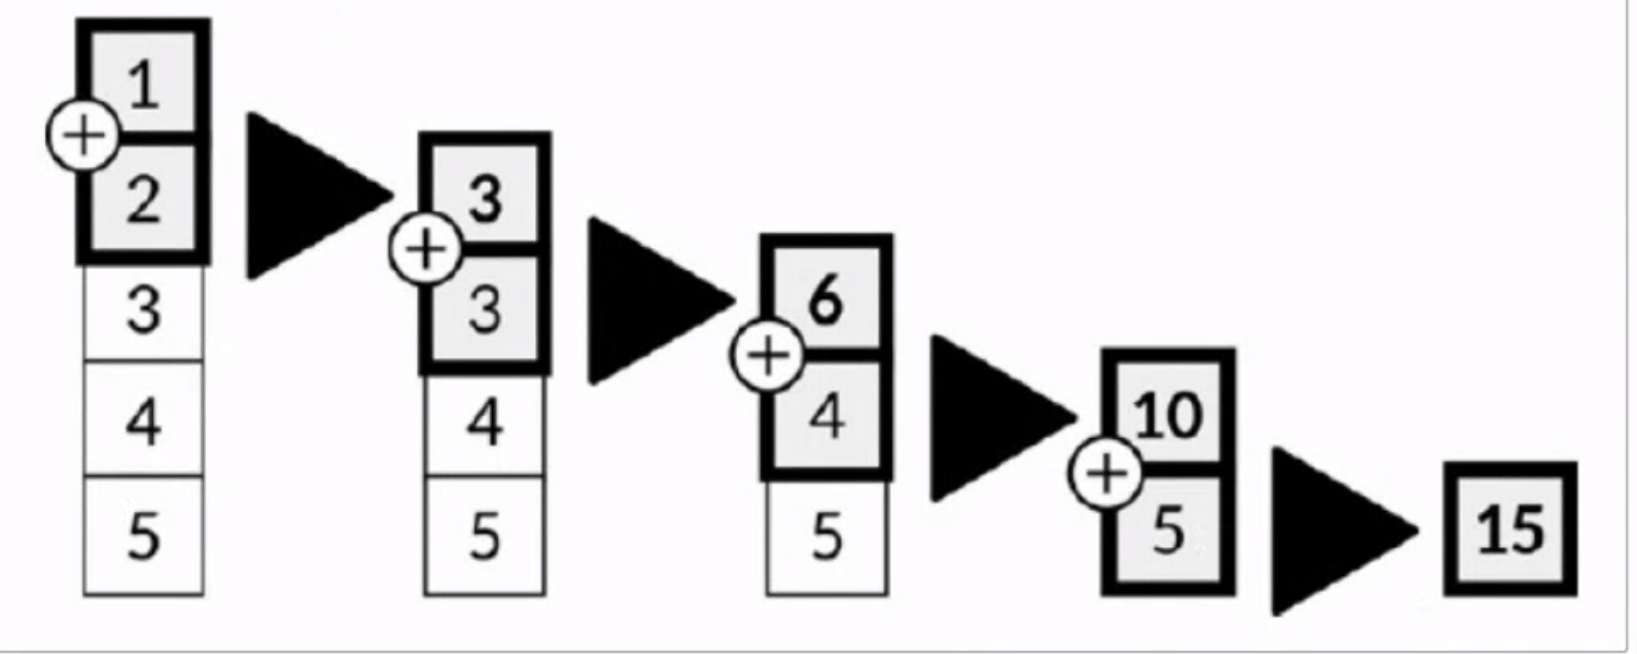

In [12]:
#Para crear un RDD con los números del 1 al 15 y calcular su suma, definiria una funcion de reduccion
#add e invocariamos a reduce como sigue:
def add(x,y):
    return x + y
#llamada a reduce
r = sc.parallelize(range(1,6))
r.reduce(add)

15

In [13]:
#Utilizando una función anónima o lambda
r = sc.parallelize(range(1,6))
r.reduce(lambda x,y: x+y)

15

In [16]:
#Metodo takeOrdered, take
# Va de los ultimos a los primeros
r = sc.parallelize(range(1000))
r.takeOrdered(10, lambda x: -x)

[999, 998, 997, 996, 995, 994, 993, 992, 991, 990]

In [15]:
r = sc.parallelize(range(1000))
r.takeSample(False,10)

[461, 827, 781, 359, 512, 479, 825, 353, 103, 754]

In [14]:
def multiply_positive(x,y):
    if x > 0 and y > 0:
        return x*y
    elif x > 0:
        return x
    elif y > 0:
        return y
    else:
        return 1
    
r = sc.parallelize([-1,2,1,-5,8])
r.reduce(multiply_positive)

16

In [ ]:
sc.stop()

reduce  se requiere que la función sea conmutativa y asociativa para los dos valores
cualquiera x,y, f(x,y) = f(y,x) y para una triada : x,y,z, f(x,f(y,z) ) = f(f(x,y),z).
Ejemplos de funciones conmutativas y asociativas son la suma, la multiplicación, el mínimo o el máximo.
La resta o la división no son conmutativas ni asociativas.(no se pueden reducir)
***
* MapReduce requiere de acciones como la replicación, serialización y E/S de almacenamiento para poder ejecutar
* las operaciones solicitadas.
* Éstas últmas son las que más requiere el sistemade archivos de Hadoop. 
* Cualquier operación de MapReduce requiere del almacenamiento.
reduce es una Acción en el RDD.
Acciones: collect(), count(), take(x), takeOrdered(x,y), takeSample(x, y), countByKey(), foreach(funcion())

In [19]:
#Ejemplo
r = sc.parallelize(range(3), 1) #una particion[0,1,2]
r.reduce(lambda x,y: x-y)
#(0-1) - 2

-3

In [20]:
r = sc.parallelize(range(3), 2) #dos particion[0] y [1,2]
r.reduce(lambda x,y: x-y)
# (0) y (1-2)
#  0    -1
# 0 - (-1)

1

In [17]:
#Manejo de cadenas. Utilización del método aggregate. 
#Tres parametros: 1)Un valor inicial para el acumulador, zeroValue que tendrá tipo C
# 2) Una función seqOp para combinar elementos de nuestro RDD (de tipo T)
# con el acumulador de tipo C, devolviendo un valor de tipo C (C x T -> C)
# 3) Una función combOp para combinar dos acumuladores de tipo C y devolver un valor de tipo C.
#Cuenta las h en el RDD
r = sc.parallelize(["hola","hi","ciao","hjk"])
#              (int, cuenta las h,   suma los acumuladores) >> valor inicial, map, reduce )
#             MAP                       REDUCE
r.aggregate(0,lambda c, s: c + s.count("h"),lambda c1,c2:c1+c2 )
#(h,1)
#(h,1)
#(h,0)

3

In [19]:
#Para trabajo de archivo en HDP, Consultar clase pyspark.RDD
#saveAsSequenceFile, saveAsNewAPIHadoopDataset or saveAsNewAPIHadoopFile
r = sc.parallelize(range(1000), 2)
r.saveAsTextFile("C:\\Big Data\\numeros")
#Crea carpeta con los archivos resultantes del RDD
#EL RDD se particionara en varios procesos executor, al convertir 
#un RDD a texto cada particion generara una archivo diferente.
#Cada archivo_part - XXXX(XXXX numeracion correlativa)
#Ademas se genera un archivo_SUCCESS que indica que el
#Proceso de grabacion fue exitoso.

Py4JJavaError: An error occurred while calling o152.saveAsTextFile.
: org.apache.spark.SparkException: Job aborted.
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:106)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopDataset$1(PairRDDFunctions.scala:1090)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1088)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$4(PairRDDFunctions.scala:1061)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1026)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$3(PairRDDFunctions.scala:1008)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1007)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$2(PairRDDFunctions.scala:964)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:962)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$2(RDD.scala:1578)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1578)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$1(RDD.scala:1564)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1564)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile(JavaRDDLike.scala:551)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile$(JavaRDDLike.scala:550)
	at org.apache.spark.api.java.AbstractJavaRDDLike.saveAsTextFile(JavaRDDLike.scala:45)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 12.0 failed 1 times, most recent failure: Lost task 0.0 in stage 12.0 (TID 123) (DELL-DMD executor driver): java.io.IOException: (null) entry in command string: null chmod 0644 C:\Big Data\numeros\_temporary\0\_temporary\attempt_202205021226306836419379256047387_0024_m_000000_0\part-00000
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:773)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:869)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:852)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.ChecksumFileSystem$ChecksumFSOutputSummer.<init>(ChecksumFileSystem.java:398)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:461)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:440)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:911)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:804)
	at org.apache.hadoop.mapred.TextOutputFormat.getRecordWriter(TextOutputFormat.java:123)
	at org.apache.spark.internal.io.HadoopMapRedWriteConfigUtil.initWriter(SparkHadoopWriter.scala:238)
	at org.apache.spark.internal.io.SparkHadoopWriter$.executeTask(SparkHadoopWriter.scala:126)
	at org.apache.spark.internal.io.SparkHadoopWriter$.$anonfun$write$1(SparkHadoopWriter.scala:88)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1462)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2403)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2352)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2351)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2351)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1109)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1109)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1109)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2591)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2533)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2522)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:898)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2214)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2235)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2267)
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:83)
	... 51 more
Caused by: java.io.IOException: (null) entry in command string: null chmod 0644 C:\Big Data\numeros\_temporary\0\_temporary\attempt_202205021226306836419379256047387_0024_m_000000_0\part-00000
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:773)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:869)
	at org.apache.hadoop.util.Shell.execCommand(Shell.java:852)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:733)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:225)
	at org.apache.hadoop.fs.RawLocalFileSystem$LocalFSFileOutputStream.<init>(RawLocalFileSystem.java:209)
	at org.apache.hadoop.fs.RawLocalFileSystem.createOutputStreamWithMode(RawLocalFileSystem.java:307)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:296)
	at org.apache.hadoop.fs.RawLocalFileSystem.create(RawLocalFileSystem.java:328)
	at org.apache.hadoop.fs.ChecksumFileSystem$ChecksumFSOutputSummer.<init>(ChecksumFileSystem.java:398)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:461)
	at org.apache.hadoop.fs.ChecksumFileSystem.create(ChecksumFileSystem.java:440)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:911)
	at org.apache.hadoop.fs.FileSystem.create(FileSystem.java:804)
	at org.apache.hadoop.mapred.TextOutputFormat.getRecordWriter(TextOutputFormat.java:123)
	at org.apache.spark.internal.io.HadoopMapRedWriteConfigUtil.initWriter(SparkHadoopWriter.scala:238)
	at org.apache.spark.internal.io.SparkHadoopWriter$.executeTask(SparkHadoopWriter.scala:126)
	at org.apache.spark.internal.io.SparkHadoopWriter$.$anonfun$write$1(SparkHadoopWriter.scala:88)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1462)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [20]:
#Transformacion map
#Permite aplicara una funcion elemento a elemento en un RDD.
#RDD con elemento tipo T y una funcion f que acepta elementos T.
#y produce valores tipo V y la transformacion
#map(f) genera un RDD de elementos tipo V
r = sc.parallelize([1,2,3,4])
r2 = r.map(lambda x:x+1)
r2.collect()

[2, 3, 4, 5]

In [21]:
#Sin lambda
def increment(x):
    return x+1
r = sc.parallelize([1,2,3,4])
r2 = r.map(increment)
r2.collect()

[2, 3, 4, 5]

In [22]:
r = sc.parallelize(["hola","hi","ciao"])
r2= r.map(lambda x:len(x))
r2.collect()

[4, 2, 4]

In [23]:
import csv
r = sc.parallelize(["1,5,7","8,2,4"]) #cadena en formato CSV
r2 = r.map(lambda x:list(csv.reader([x]))[0]) #como resultado una lista
#por eso se utiliza [0]
r2.collect()
#Nota el resultado como se puede ver con cadena de texto y NO NUMEROS

[['1', '5', '7'], ['8', '2', '4']]

In [24]:
r3 = r2.map(lambda l:[int(e) for e in l])
r3.collect()

[[1, 5, 7], [8, 2, 4]]

In [28]:
#flatmap : para aplagar las listas
r = sc.parallelize(["1,5,7","8,2,4"])
r2 = r.flatMap(lambda s:list(csv.reader([s]))[0])
r2.collect()

['1', '5', '7', '8', '2', '4']

In [30]:
#filter permite seleccionar de un RDD aquellos elementos que cumplen con un
def es_primo(x):
    for i in range(2,x):
        if x % i == 0:
            return False
    return True
r = sc.parallelize(range(2,31))
r2 = r.filter(es_primo)
r2.collect()

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

In [31]:
#parejas (llaves, valor)
#mapValue permiete aplicar una función a todos los registros pero afectando unicamente a los valores de las parejas
r = sc.parallelize([("a",0),("b",1),("c",2)])
r2 = r.mapValues(lambda x: x+1)
r2.collect()

[('a', 1), ('b', 2), ('c', 3)]

In [32]:
#Considerar parjeas (str, str) stricada valor es una cadena de numero en formato CSV
import csv
r = sc.parallelize([('a','1,5,7'),('b','8,2')])
r2 = r.flatMapValues(lambda x: list(csv.reader([x]))[0])
r2.collect()

[('a', '1'), ('a', '5'), ('a', '7'), ('b', '8'), ('b', '2')]

In [10]:
#Objetos iterables con groupByKey
r = sc.parallelize([('a',3.14),('b', 2.7),('a',2.7)])
r2 = r.groupByKey()
r2.collect()

[('b', <pyspark.resultiterable.ResultIterable at 0x139b5c9df40>),
 ('a', <pyspark.resultiterable.ResultIterable at 0x139b89c4040>)]

In [11]:
#Para visualizar se aplica una transformación
r3 = r2.mapValues(lambda x:list(x))
r3.collect()

[('b', [2.7]), ('a', [3.14, 2.7])]

In [12]:
#Transformación reduceByKey comportamiento parecido a groupByKey
r = sc.parallelize([('a',2),('b', 1),('a',3)])
r2 = r.reduceByKey(lambda x,y : x+y)
r2.collect()

[('b', 1), ('a', 5)]

In [14]:
#Transformaciones combinados RDDs
#union
r1 = sc.parallelize([1,2,3,4])
r2 = sc.parallelize([2,4,6])
r3 = r1.union(r2)
r3.collect()

[1, 2, 3, 4, 2, 4, 6]

In [15]:
#distinct
#Eliminar los repetidos de arriba.
r4 = r3.distinct()
r4.collect()

[1, 2, 3, 4, 6]

In [16]:
#intersection
r1 = sc.parallelize([1,2,3,4])
r2 = sc.parallelize([2,4,2,6])
r3 = r1.intersection(r2)
r3.collect()

[2, 4]

In [18]:
#Substract: selecciona elmeentos de una RDD(r1) que no se encuentren en otro(r2).
#S1 on r1 aparecen repetidos, apareceran en el RDD resultante
r1 = sc.parallelize([1,2,3,4,1])
r2 = sc.parallelize([2,6])
r3 = r1.subtract(r2)
r3.collect()

[1, 1, 3, 4]

In [19]:
#Cartesian
r1 = sc.parallelize([1,2,3])
r2 = sc.parallelize(['a','b'])
r3 = r1.cartesian(r2)
r3.collect()

[(1, 'a'), (1, 'b'), (2, 'a'), (2, 'b'), (3, 'a'), (3, 'b')]

In [20]:
#join
r1 = sc.parallelize([('a',1),('b',2),('c',3)])
r2 = sc.parallelize([('b',8),('d',7)])
r3 = r1.join(r2)
r3.collect()

[('b', (2, 8))]

In [21]:
r1 = sc.parallelize([('a',1),('b',2),('c',3)])
r2 = sc.parallelize([('b',8),('d',7),('b',0)])
r3 = r1.join(r2)
r3.collect()

[('b', (2, 8)), ('b', (2, 0))]

In [22]:
sc.stop()